In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


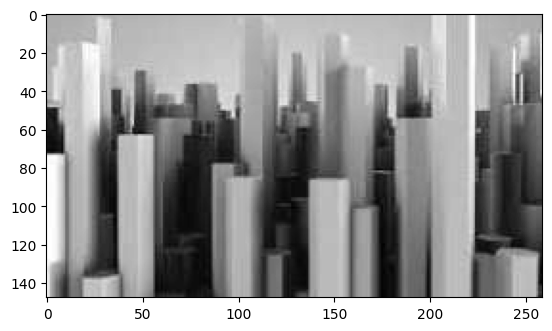

In [2]:
(x_train,y_train),(xtest,y_test) = fashion_mnist.load_data()
image1 = cv.imread('/content/download (1).jpg')
gray = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [3]:
def get_freq(image):
  pixel_freq = np.zeros(256)
  for row in range(image.shape[0]):
    for col in range(image.shape[1]):
      pixel_value = image[row][col]
      pixel_freq[pixel_value] += 1
  return (pixel_freq)

In [4]:
def get_pixel_map(img):
  pixel_freq = get_freq(img)
  pixel_pdf = pixel_freq / np.sum(pixel_freq)
  pixel_cumsum =  np.cumsum(pixel_pdf)
  bits_cumsum = (256-1) * pixel_cumsum
  pixel_map = np.fix(bits_cumsum).astype(int)
  return pixel_map


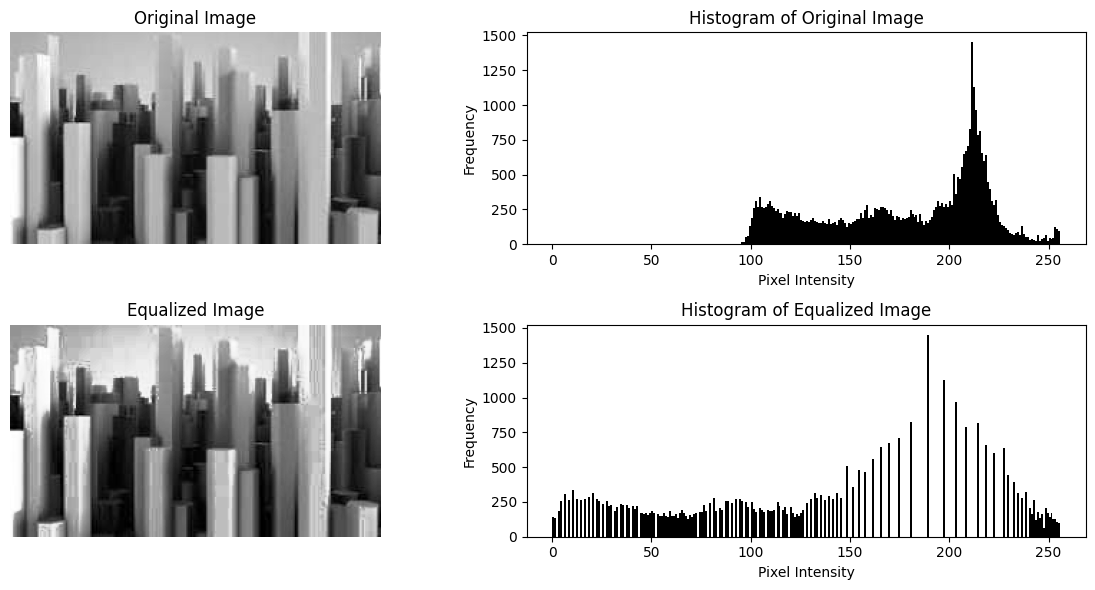

In [5]:
def histogram_equalization(img):
  output = img.copy()
  pixel_map = get_pixel_map(img)
  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      pixel_value = img[row][col]
      output[row][col] = pixel_map[pixel_value]
  return output

# Apply histogram equalization
image_eq = histogram_equalization(gray)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(gray.ravel(), bins=256, range=[0,256], color='black')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.imshow(image_eq, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(image_eq.ravel(), bins=256, range=[0,256], color='black')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()





In [6]:
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

93.0 255.0


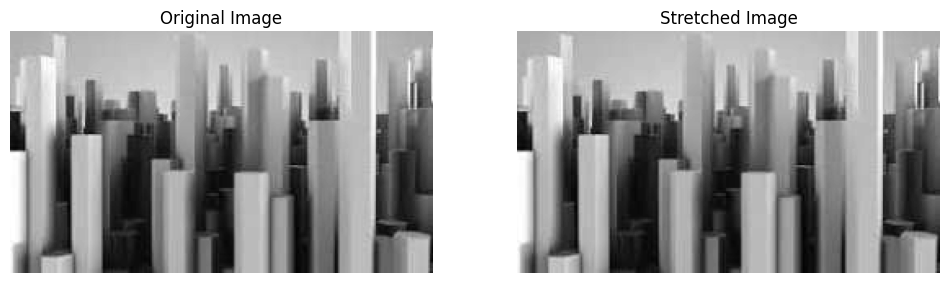

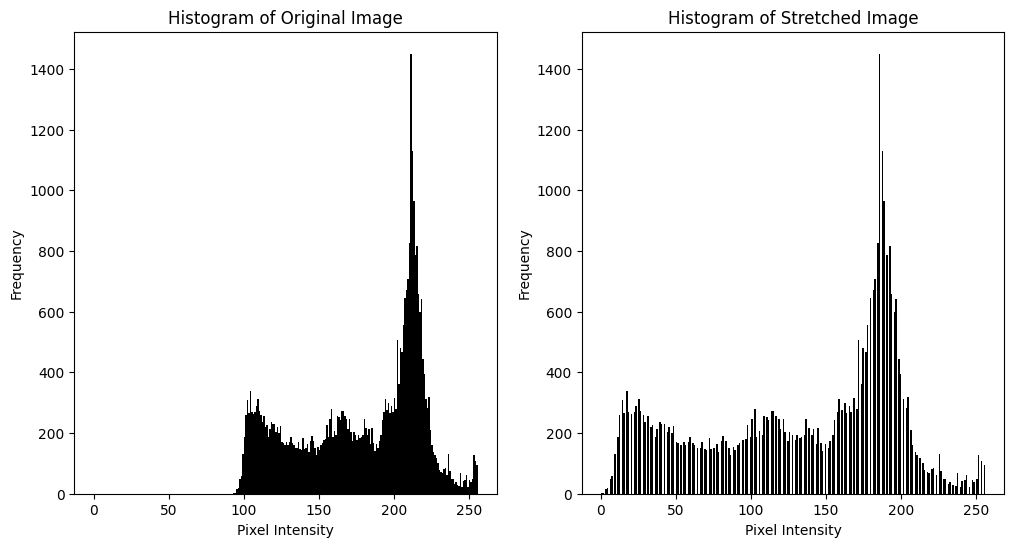

In [7]:
def histogram_stretching(image):
  image = image.astype(np.float32)
  min_in, max_in = image.min(), image.max()
  print(min_in, max_in)

  if min_in == max_in:
      return np.zeros_like(image, dtype=np.uint8)

  min_out, max_out = 0, 255
  stretched = ((image - min_in) * (max_out - min_out) / (max_in - min_in) ).astype(np.uint8)

  return stretched

# Apply histogram stretching
image_stretched = histogram_stretching(gray)

# Display the original and stretched image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_stretched, cmap='gray')
plt.title('Stretched Image')
plt.axis('off')
plt.show()

# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_histogram(gray, 'Histogram of Original Image')

plt.subplot(1, 2, 2)
plot_histogram(image_stretched, 'Histogram of Stretched Image')
plt.show()
